# Importing Various Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, log_loss, r2_score
from sklearn.datasets import make_blobs

import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [2]:
df = pd.read_csv("./heart.csv")

# Exploratory Data Analysis

In [3]:
df.head(10)#See the first 10 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
df.shape #Shape of the dataset

(303, 14)

In [5]:
df.isnull().values.any() #Check whether there is NULL value

False

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

age - age in years
sex - (1 = male; 0 = female)
cp - chest pain type
trestbps - resting blood pressure (in mm Hg on admission to the hospital)
chol - serum cholestoral in mg/dl
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg - resting electrocardiographic results
thalach - maximum heart rate achieved
exang - exercise induced angina (1 = yes; 0 = no)
oldpeak - ST depression induced by exercise relative to rest
slope - the slope of the peak exercise ST segment
ca - number of major vessels (0-3) colored by flourosopy
thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
target - have disease or not (1=yes, 0=no)

In [7]:
df.corr().head() #Correlation between different features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239


Text(0.5, 1.0, 'Correlation')

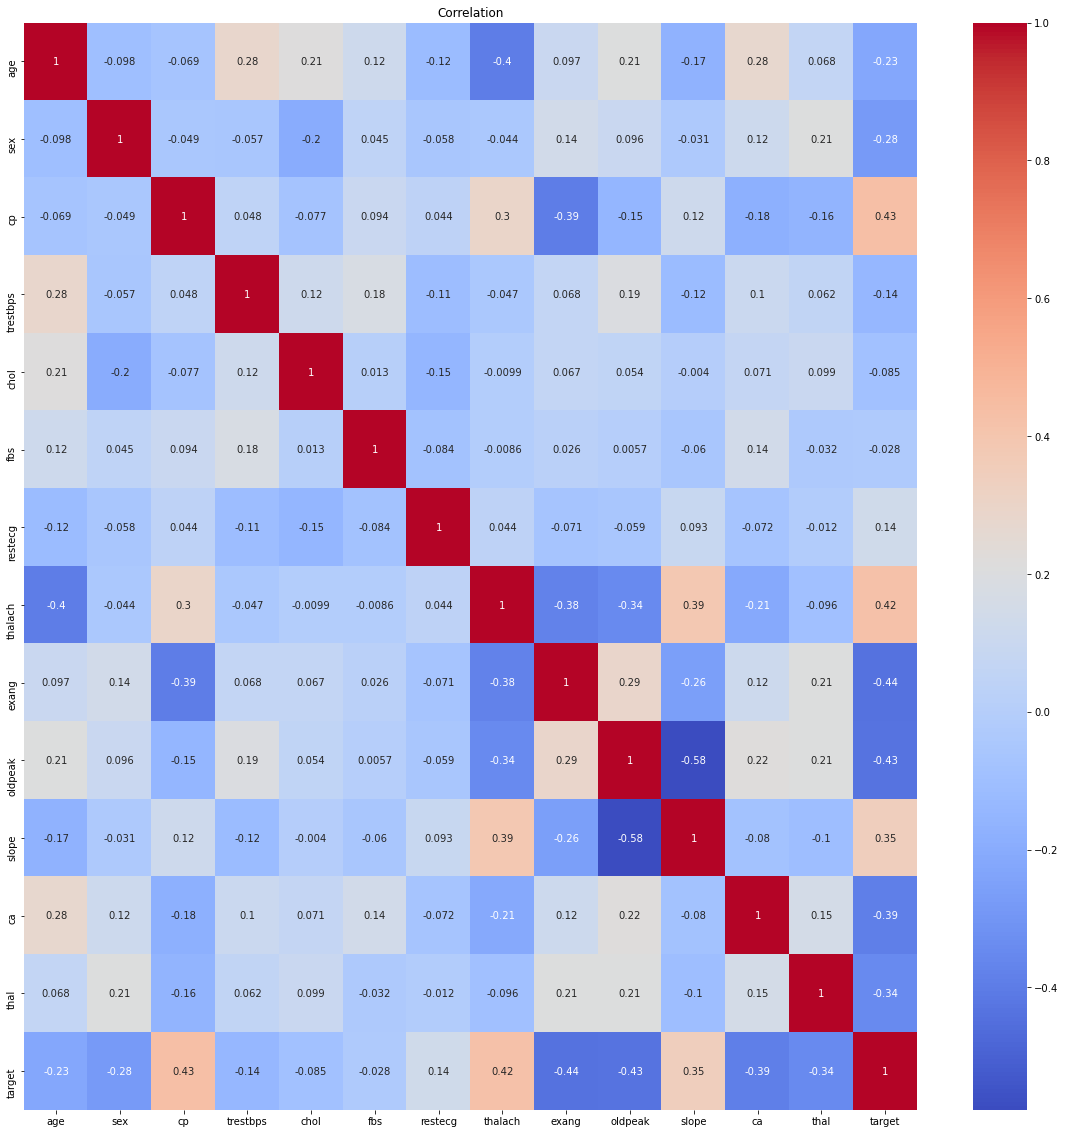

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm").set_title('Correlation')

In [9]:
df['target'].value_counts(dropna=False) #

1    165
0    138
Name: target, dtype: int64

# Data Visualtiztion

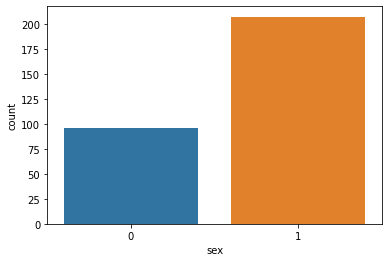

In [10]:
sns.countplot(x="sex", data=df)
plt.show()

In [11]:
df1= df.copy()
#Removed categorical features to check the pairplot
df1.drop(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal','target'], axis=1, inplace=True)
df1.head()

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


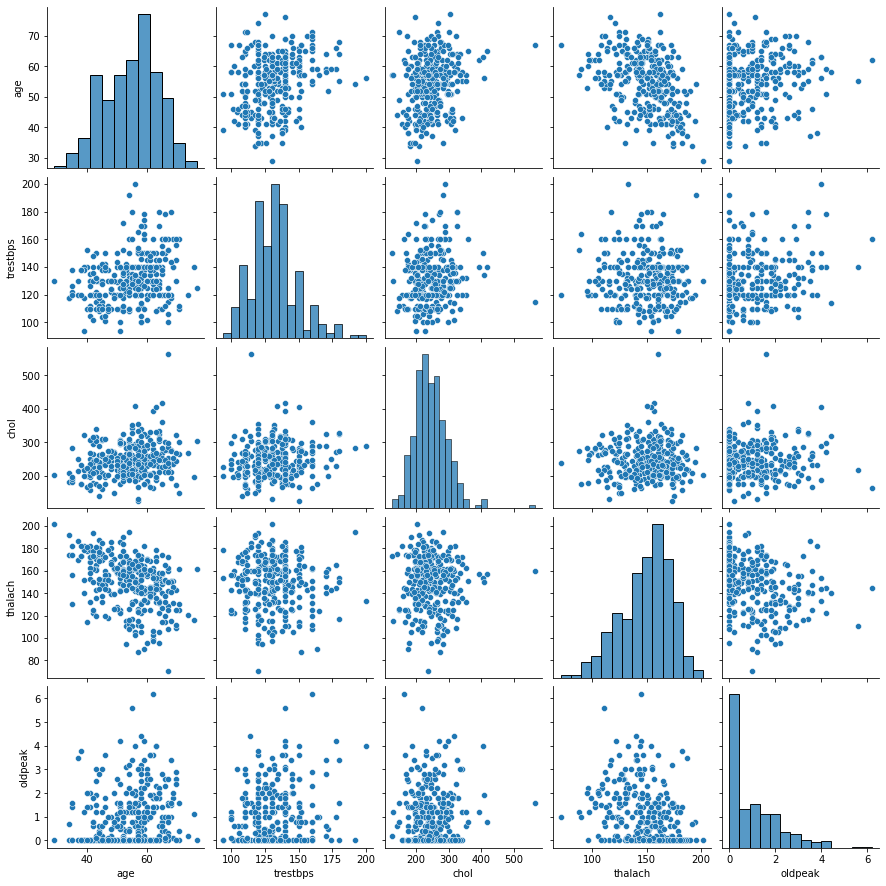

In [12]:
g = sns.pairplot(df1)

# Removing outliers

In [13]:
df = df[df['oldpeak']<5] 
df=  df[df['chol']<500]
df.shape

(300, 14)

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
def calc_limits(feature):
    q1,q3=df[feature].quantile([0.25,0.75])
    iqr=q3-q1
    rang=1.5*iqr
    return(q1-rang,q3+rang)
for col in df1.columns:
    lower,upper=calc_limits(col)
    df = df[(df[col] >lower) & (df[col]<upper)]
df.shape

(279, 14)

In [16]:
df['target'].value_counts(dropna=False)

1    158
0    121
Name: target, dtype: int64

In [17]:
categorical_data = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'] 
dataset = pd.get_dummies(df, columns = categorical_data) #Deal with categorical values
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [18]:
dataset.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [19]:
X = dataset.loc[:, dataset.columns != 'target']
Y = dataset.loc[:, dataset.columns == 'target']

sm = SMOTE(random_state=0)  #oversampling the Dataset
X , Y = sm.fit_resample(X,Y)
X = pd.DataFrame(X, columns = X.columns )
Y = pd.DataFrame(Y, columns = ['target'])
Y['target'].value_counts(dropna=False)

1    158
0    158
Name: target, dtype: int64

# Removing Features

In [20]:
rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, Y)
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 20


In [21]:
print(np.where(rfecv.support_ == False)[0])

[10 11 12 15 18 23 24 25 26 27]


In [22]:
X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)

In [23]:
dset

,attr,importance
16,ca_0,0.132953
18,thal_2,0.132308
4,oldpeak,0.090150
3,thalach,0.084638
0,age,0.079260
2,chol,0.064188
1,trestbps,0.056395
7,cp_0,0.050703
12,exang_0,0.045883
15,slope_2,0.040807


In [24]:
X

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,restecg_0,restecg_1,exang_0,exang_1,slope_1,slope_2,ca_0,ca_1,thal_2,thal_3
0,63,145,233,150,2.300000,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
1,37,130,250,187,3.500000,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0
2,41,130,204,172,1.400000,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0
3,56,120,236,178,0.800000,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0
4,57,120,354,163,0.600000,1,0,1,0,0,0,1,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,55,129,282,103,1.608143,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1
312,63,156,279,109,1.235992,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0
313,56,126,251,143,1.004196,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0
314,57,135,318,151,0.033666,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
import statsmodels.api as sm
logit_model=sm.Logit(Y.astype(float), X.astype(float)) 
result=logit_model.fit() #to determine the significance of the feautures
result.summary2()

Optimization terminated successfully.
         Current function value: 0.290651
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.581     
Dependent Variable: target           AIC:              223.6914  
Date:               2020-11-27 14:29 BIC:              298.8063  
No. Observations:   316              Log-Likelihood:   -91.846   
Df Model:           19               LL-Null:          -219.03   
Df Residuals:       296              LLR p-value:      4.0141e-43
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
age            0.0073    0.0239   0.3046  0.7607  -0.0396   0.0541
trestbps      -0.0215    0.0129  -1.6589  0.0971  -0.0468   0.0039
chol          -0.0097    0.0049  -1.9696  0.0489  -0.0194  -0.0000
thalach        0.0033    0.0104   0.3190  0.7497  -0.0170   0.0237
oldpeak       -0.5810    0.2558  -2.2715  0.0231  -1.0823  -0.0797
sex_0          1.2158    1.8761   0.6481  0.5169  -2.4613   4.8930
sex_1         -0.0834    1.7685  -0.0472  0.9624  -3.5496   3.3828
cp_0          -1.5006    0.6276  -2.3909  0.0168  -2.7307  -0.2705
cp_1          -0.2884    0.7571  -0.3810  0.7032  -1.7722   1.1954
cp_2           0.6131    0.6529   0.9390  0.3477  -0.6666   1.8927
restecg_0      1.1583    1.5522   0.7462  0.4555  -1.8840   4.2007
restecg_1      1.7883    1.5625   1.1445  0.2524  -1.2742   4.8509
exang_0        1.4135    1.8140   0.7792  0.4359  -2.1420   4.9689
exang_1        0.8614    1.8299   0.4707  0.6378  -2.7252   4.4479
slope_1       -0.0843    0.8128  -0.1037  0.9174  -1.6774   1.5088
slope_2        0.7940    0.8491   0.9351  0.3497  -0.8702   2.4582
ca_0           2.6345    0.5840   4.5114  0.0000   1.4900   3.7791
ca_1           0.3391    0.6180   0.5487  0.5832  -0.8722   1.5505
thal_2         1.4286    0.6798   2.1016  0.0356   0.0963   2.7610
thal_3        -0.3501    0.6691  -0.5232  0.6008  -1.6615   0.9613
=================================================================

"""

In [26]:
X.drop(['age', 'trestbps', 'thalach', 'sex_0', 'sex_1', 'cp_1', 'cp_2', 'restecg_0','restecg_1' ,'exang_0','exang_1','slope_1','slope_2','ca_1','thal_3'], axis=1, inplace=True)
X.columns

Index(['chol', 'oldpeak', 'cp_0', 'ca_0', 'thal_2'], dtype='object')

# Building Model

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver="liblinear", C=1, penalty = 'l2')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
pred_proba = logreg.predict_proba(X_test)
log_loss = log_loss(y_test, pred_proba)
confusion_matrix = confusion_matrix(y_test, y_pred)


# Evaluating the model

In [28]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Logloss:",log_loss)
print(confusion_matrix)
print("R2 score:{:.2f}".format(r2_score(y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 0.87
Precision: 0.8979591836734694
Logloss: 0.33044629924767294
[[39  5]
 [ 7 44]]
R2 score:0.49


In [29]:
Xnew, _ = make_blobs(n_samples=3, n_features=5, random_state=1)
ynew = logreg.predict(Xnew)
for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))


X=[ -2.51946651   6.1790975  -11.10807556  -3.77213428  -6.50053732], Predicted=0
X=[-8.71973833 -5.54482018 -2.71579167 -1.5308396   0.68436138], Predicted=1
X=[  0.29771068   4.03518714  -4.76901249   6.43275357 -10.30230051], Predicted=0


# Saving the model

In [30]:
import pickle
filename = 'Log_reg_model.pkl'
pickle.dump(logreg, open(filename, 'wb'))